In [1]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.4f}'.format
%matplotlib inline
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
#The CSV file is imported using the read_csv command given below:
housedf = pd.read_csv("train.csv")

In [3]:
#The first ten rows of the loan Dataframe are displayed below:
housedf.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0000,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0000,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,nan,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0000,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0000,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
#The DataFrame is analysed using the below commands. 
print(housedf.shape)
#print(housedf.info())

(1460, 81)


# The percentage of missing values in the loan dataframe is calculated below

In [5]:
#the following columns have missing values
round(100*(housedf.isnull().sum()/len(housedf.index)),2)[round(100*(housedf.isnull().sum()/len(housedf.index)),2)>0]

LotFrontage    17.7400
Alley          93.7700
MasVnrType      0.5500
MasVnrArea      0.5500
BsmtQual        2.5300
BsmtCond        2.5300
BsmtExposure    2.6000
BsmtFinType1    2.5300
BsmtFinType2    2.6000
Electrical      0.0700
FireplaceQu    47.2600
GarageType      5.5500
GarageYrBlt     5.5500
GarageFinish    5.5500
GarageQual      5.5500
GarageCond      5.5500
PoolQC         99.5200
Fence          80.7500
MiscFeature    96.3000
dtype: float64

### Replaceing Null Values

In [6]:
# replace all na values with default none or o 0
housedf['PoolQC'] = housedf['PoolQC'].fillna('None')
housedf['MiscFeature'] = housedf['MiscFeature'].fillna('None')
housedf["MasVnrType"] = housedf["MasVnrType"].fillna("None")
housedf["MasVnrArea"] = housedf["MasVnrArea"].fillna(0)
housedf['Alley'] = housedf['Alley'].fillna('None')
housedf['Fence'] = housedf['Fence'].fillna('None')
housedf['MSZoning'] = housedf['MSZoning'].fillna(housedf['MSZoning'].mode()[0])
housedf['FireplaceQu'] = housedf['FireplaceQu'].fillna('None')
housedf["LotFrontage"] = housedf.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
housedf['GarageType'] = housedf['GarageType'].fillna('None')
housedf["Functional"] = housedf["Functional"].fillna("Typ")
housedf['SaleType'] = housedf['SaleType'].fillna(housedf['SaleType'].mode()[0])
housedf['GarageFinish'] = housedf['GarageFinish'].fillna('None')
housedf['MSSubClass'] = housedf['MSSubClass'].fillna("None")
housedf['Exterior1st'] = housedf['Exterior1st'].fillna(housedf['Exterior1st'].mode()[0])
housedf['Exterior2nd'] = housedf['Exterior2nd'].fillna(housedf['Exterior2nd'].mode()[0])
housedf['GarageQual'] = housedf['GarageQual'].fillna('None')
housedf['GarageCond'] = housedf['GarageCond'].fillna('None')
housedf['KitchenQual'] = housedf['KitchenQual'].fillna(housedf['KitchenQual'].mode()[0])
housedf['Electrical'] = housedf['Electrical'].fillna(housedf['Electrical'].mode()[0])
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    housedf[col] = housedf[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    housedf[col] = housedf[col].fillna('None')

In [7]:
round(100*(housedf.isnull().sum()/len(housedf.index)),2)[round(100*(housedf.isnull().sum()/len(housedf.index)),2)>0]

Series([], dtype: float64)

In [8]:
housedf.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
# droping ID column
housedf = housedf.drop('Id',axis=1)

## Createing Derived Columns

In [10]:
#genrating Age from year 
housedf['AgeBuilt']=2019-housedf['YearBuilt']
housedf['AgeRemodAdd']=2019-housedf['YearRemodAdd']
housedf['AgeGarageYrBlt']=2019-housedf['GarageYrBlt']
housedf["AgeSold"]=housedf.apply(lambda row: 2019-row['YrSold'] + (row['MoSold']/12) ,axis=1)
housedf['TotalSF'] = housedf['TotalBsmtSF'] + housedf['1stFlrSF'] + housedf['2ndFlrSF']
housedf.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeBuilt,AgeRemodAdd,AgeGarageYrBlt,AgeSold,TotalSF
0,60,RL,65.0000,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,2,2008,WD,Normal,208500,16,16,16.0000,11.1667,2566
1,20,RL,80.0000,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,5,2007,WD,Normal,181500,43,43,43.0000,12.4167,2524
2,60,RL,68.0000,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,9,2008,WD,Normal,223500,18,17,18.0000,11.7500,2706
3,70,RL,60.0000,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,2,2006,WD,Abnorml,140000,104,49,21.0000,13.1667,2473
4,60,RL,84.0000,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,12,2008,WD,Normal,250000,19,19,19.0000,12.0000,3343


In [11]:
#Droping redundent data
housedf = housedf.drop(['YrSold','MoSold','YearBuilt','YearRemodAdd','GarageYrBlt',
                        'TotalBsmtSF','1stFlrSF','2ndFlrSF'],axis=1)


In [12]:
housedf.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       

## conveting to catgorical type

In [13]:
concol=['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath',
        'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces']
for col in concol:
    housedf[col] = housedf[col].astype('object')

### Data analysis

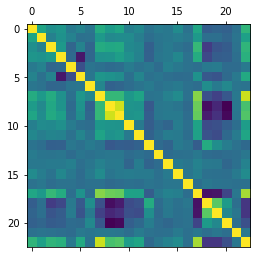

In [14]:
#correlation matrix
plt.matshow(housedf.corr())
plt.show()

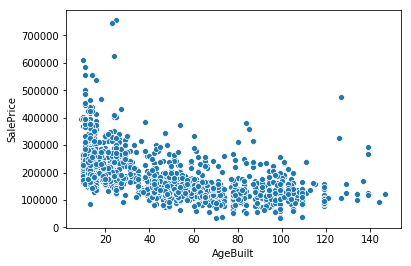

In [15]:
# scatterplot age of house to saleprice
ax = sns.scatterplot( x='AgeBuilt', y='SalePrice', data=housedf)
plt.show()

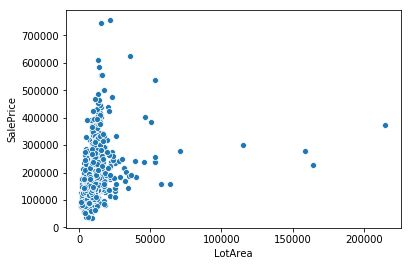

In [16]:
# scatterplot age of OverallCond to saleprice
ax = sns.scatterplot( x='LotArea', y='SalePrice', data=housedf)
plt.show()

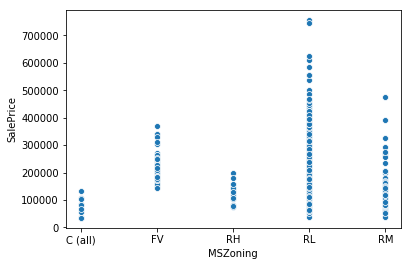

In [17]:
# scatterplot age of OverallCond to saleprice
ax = sns.scatterplot( x='MSZoning', y='SalePrice', data=housedf)
plt.show()

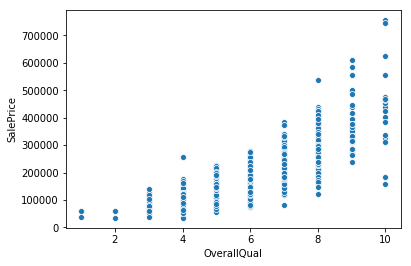

In [18]:
# scatterplot age of OverallCond to saleprice
ax = sns.scatterplot( x='OverallQual', y='SalePrice', data=housedf)
plt.show()

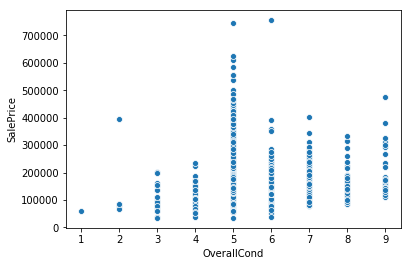

In [19]:
# scatterplot age of OverallCond to saleprice
ax = sns.scatterplot( x='OverallCond', y='SalePrice', data=housedf)
plt.show()

In [20]:
allcol=housedf.columns
numcol= [f for f in housedf.columns if housedf.dtypes[f] != 'object']
catcol=list(set(allcol).difference(numcol))


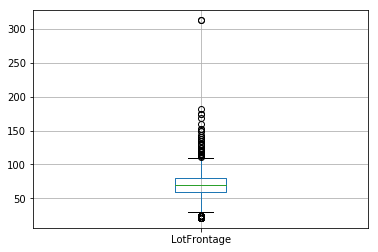

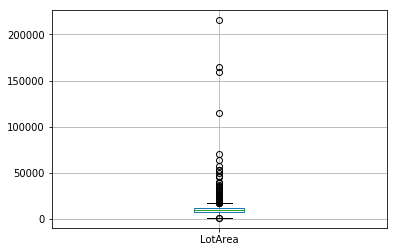

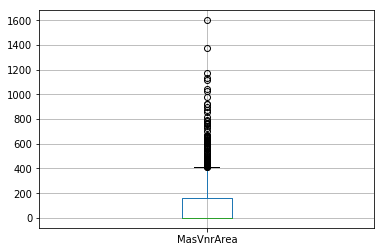

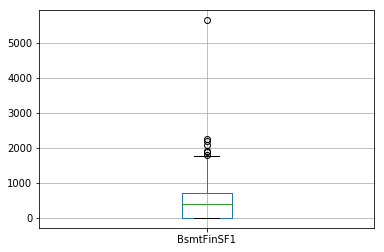

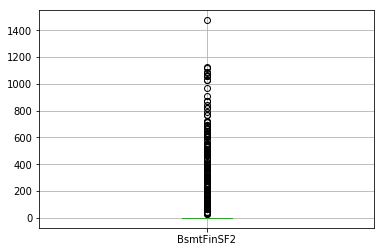

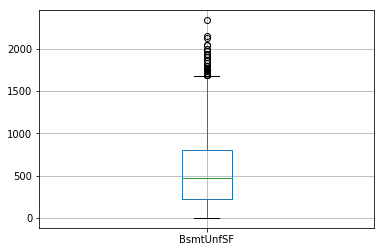

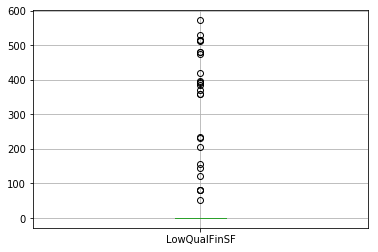

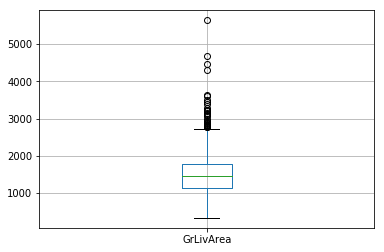

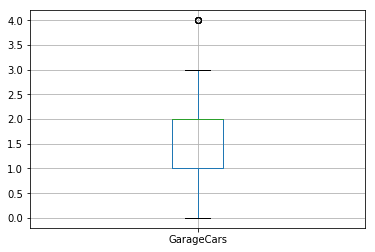

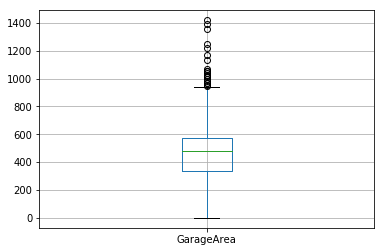

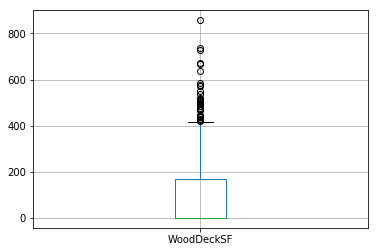

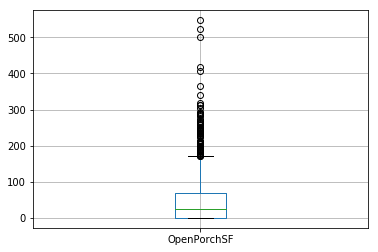

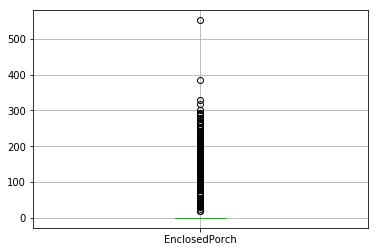

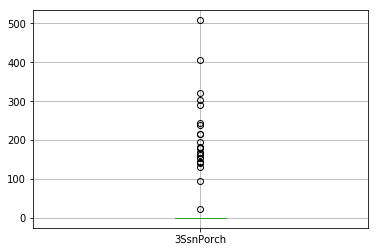

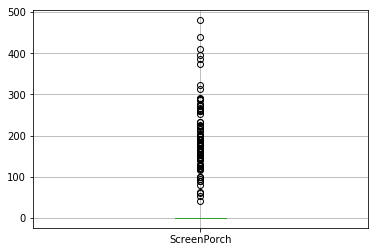

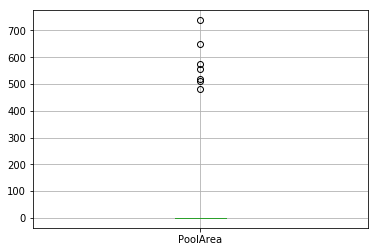

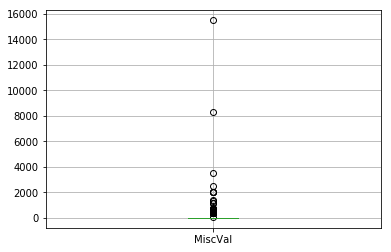

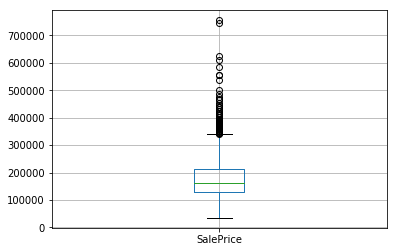

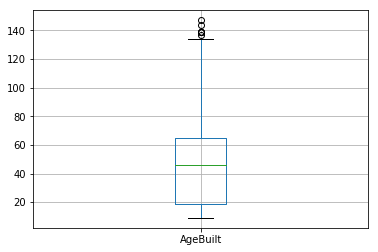

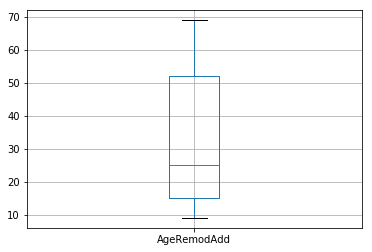

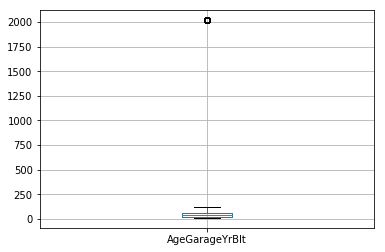

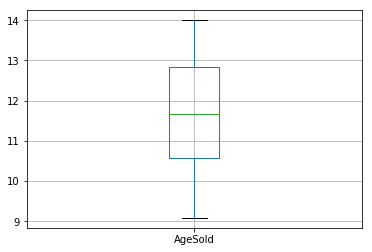

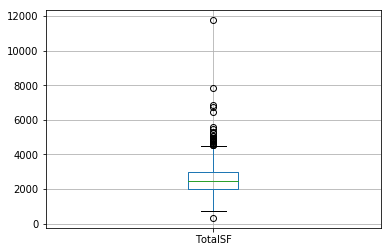

In [21]:

for column in numcol:
    plt.figure()
    housedf.boxplot([column])

### Data preparation-hot codeing

In [22]:
# Creating a dummy variable 
dummy = pd.get_dummies(housedf[catcol], drop_first=True)

# Adding the to the master dataframe
house_cat = pd.concat([housedf, dummy], axis=1)
house_cat = house_cat.drop(catcol, axis = 1)
house_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 311 entries, LotFrontage to RoofMatl_WdShngl
dtypes: float64(4), int64(19), uint8(288)
memory usage: 673.0 KB


In [23]:
list(house_cat.columns)

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice',
 'AgeBuilt',
 'AgeRemodAdd',
 'AgeGarageYrBlt',
 'AgeSold',
 'TotalSF',
 'RoofStyle_Gable',
 'RoofStyle_Gambrel',
 'RoofStyle_Hip',
 'RoofStyle_Mansard',
 'RoofStyle_Shed',
 'Utilities_NoSeWa',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_None',
 'BsmtQual_TA',
 'ExterQual_Fa',
 'ExterQual_Gd',
 'ExterQual_TA',
 'Functional_Maj2',
 'Functional_Min1',
 'Functional_Min2',
 'Functional_Mod',
 'Functional_Sev',
 'Functional_Typ',
 'FireplaceQu_Fa',
 'FireplaceQu_Gd',
 'FireplaceQu_None',
 'FireplaceQu_Po',
 'FireplaceQu_TA',
 'Fence_GdWo',
 'Fence_MnPrv',
 'Fence_MnWw',
 'Fence_None',
 'Street_Pave',
 'PoolQC_Fa',
 'PoolQC_Gd',
 'PoolQC_None',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_CB

In [24]:
x=house_cat.drop('SalePrice', 1)
y=house_cat['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

### StandardScaler

In [25]:
from sklearn.preprocessing import StandardScaler

# scale
scaler = StandardScaler()
scaler.fit(x)


x.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea',
       ...
       'Fireplaces_3', 'Alley_None', 'Alley_Pave', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl'],
      dtype='object', length=310)

### test train split

In [26]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=2)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Lasso
from  sklearn import *
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.954221691281587

In [28]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

0.6099845629799552

### the model has currenly over fitted we will use Regularzation to get better results

### Regression

### Lasso

In [29]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


## Ridge Regression

In [30]:
# list of alphas to tune

params = {'alpha':[.0001,.001,.01,1,10,20,30,50,80,100,10000]  }


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 1, 10, 20, 30, 50, 80, 100, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [31]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']>0]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.0182,0.0010,0.0010,0.0000,0.0001,{'alpha': 0.0001},"-19,389.8234","-20,995.2066","-19,121.4475","-16,689.0398",...,"-18,923.4655","1,399.0628",10,"-11,034.7396","-10,548.3237","-10,845.7661","-11,786.9184","-10,899.8409","-11,023.1177",413.6681
1,0.0190,0.0011,0.0012,0.0004,0.0010,{'alpha': 0.001},"-19,378.8043","-20,980.1590","-19,071.0738","-16,634.8383",...,"-18,892.7857","1,411.4515",9,"-11,036.0081","-10,550.8002","-10,848.5068","-11,789.5733","-10,900.2708","-11,025.0318",413.8275
2,0.0184,0.0010,0.0012,0.0004,0.0100,{'alpha': 0.01},"-19,251.3617","-20,841.9218","-18,795.7994","-16,306.0261",...,"-18,680.5653","1,474.1892",8,"-11,049.9946","-10,573.5502","-10,885.4505","-11,817.1548","-10,912.5786","-11,047.7457",415.0823
3,0.0178,0.0012,0.0008,0.0004,1,{'alpha': 1},"-17,893.9315","-18,924.3356","-16,901.6022","-14,243.0178",...,"-16,697.0186","1,664.0294",3,"-11,450.8951","-11,379.9328","-11,738.1106","-12,402.7530","-11,569.3020","-11,708.1987",367.8468
4,0.0172,0.0004,0.0008,0.0004,10,{'alpha': 10},"-17,110.2003","-18,599.3087","-16,368.7228","-14,425.7708",...,"-16,187.6606","1,605.3570",1,"-12,848.6666","-12,648.8689","-13,016.7933","-13,626.6170","-13,293.7238","-13,086.9339",342.8154


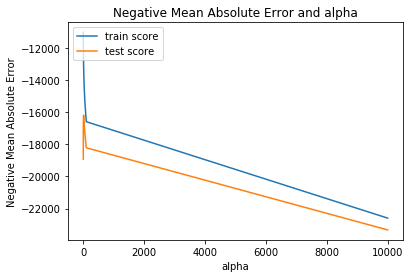

In [32]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [33]:
alpha = 300
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 1.59355028e+02,  4.75259579e-01,  3.76926598e+01,  1.75019547e+01,
       -9.67474669e+00, -1.08853466e+01, -2.88376171e+01,  1.96717254e+01,
        1.58682791e+03,  2.88863592e+01,  2.00684893e+01,  1.75038573e+01,
        2.25153812e+01,  2.31016585e+01,  4.95752498e+01,  2.09923661e+02,
       -2.87093699e-01, -3.81935918e+02, -4.26749514e+02,  2.76957638e+00,
       -1.21497181e+02,  4.54512040e+01, -1.26956363e+03,  7.17084867e+01,
        1.72392924e+03, -9.74759608e+01, -7.52941118e+01, -8.75600447e+01,
        4.50919388e+02, -4.31883576e+03,  8.34969488e+02, -2.95344398e+03,
       -3.11045386e+02, -1.10143070e+03, -3.87927889e+03, -5.82857380e+01,
       -4.38646428e+02, -1.18939520e+03, -4.93411107e+02, -2.71454889e+02,
        3.16676364e+03, -6.08659823e+02,  4.02329918e+03, -2.12849587e+03,
       -5.10206367e+02, -1.59685961e+03, -1.04876316e+00,  8.41580381e+02,
       -1.69244736e+02,  2.08126550e+02,  3.11475096e+02,  0.00000000e+00,
       -2.93415232e+02, -

In [34]:
## Lasso

In [35]:
params = {'alpha':[.0001,1,10,100,120,110,130,135,140,150,170,180,190,200,250]  }
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   38.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 1, 10, 100, 120, 110, 130, 135, 140, 150, 170, 180, 190, 200, 250]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [36]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.4548,0.0314,0.0010,0.0000,0.0001,{'alpha': 0.0001},"-19,614.3144","-20,924.6817","-19,034.3826","-16,440.5264",...,"-18,840.2981","1,494.2103",15,"-11,043.3982","-10,547.9731","-10,870.2187","-11,820.1313","-10,914.2626","-11,039.1968",423.1641
1,0.4540,0.0315,0.0010,0.0000,1,{'alpha': 1},"-18,756.4962","-20,526.7609","-18,323.2401","-15,792.5695",...,"-18,228.4865","1,531.7477",14,"-11,075.8709","-10,604.9406","-10,955.7523","-11,881.1027","-10,946.4011","-11,092.8135",424.2474
2,0.5442,0.0166,0.0010,0.0000,10,{'alpha': 10},"-17,713.8516","-19,086.1863","-17,006.7811","-14,465.6065",...,"-16,857.3507","1,559.0726",13,"-11,366.8123","-11,070.0623","-11,497.7248","-12,226.5040","-11,288.9946","-11,490.0196",393.5540
3,0.5488,0.0258,0.0010,0.0000,100,{'alpha': 100},"-16,581.7101","-17,265.5781","-16,065.0852","-13,789.2361",...,"-15,757.7396","1,214.3540",1,"-13,006.6644","-12,870.0909","-13,053.2904","-13,748.4410","-13,396.9886","-13,215.0951",318.1808
4,0.5332,0.0127,0.0012,0.0004,120,{'alpha': 120},"-16,581.3341","-17,414.2958","-16,163.2686","-13,861.6517",...,"-15,850.7023","1,217.7075",3,"-13,266.2401","-13,116.0300","-13,309.9690","-13,921.5440","-13,625.8917","-13,447.9350",289.1998


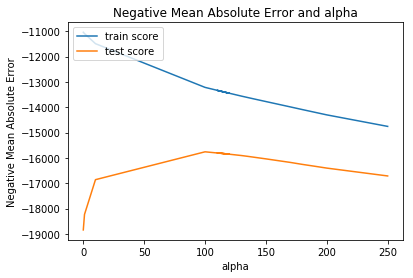

In [37]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

## 10 is a good alpha for  ridge and 100 for lasso

In [38]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [39]:
#lasso.coef_[1]

In [40]:
selcol=X_train.columns[lasso.coef_>0]
selcoff=lasso.coef_[lasso.coef_>0]
selcol

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'AgeGarageYrBlt', 'Functional_Min1', 'Functional_Typ',
       'FireplaceQu_Gd', 'FireplaceQu_TA', 'Fence_MnPrv',
       'Exterior1st_BrkFace', 'Exterior1st_Stucco', 'Exterior1st_VinylSd',
       'FullBath_3', 'MSSubClass_50', 'MSSubClass_60', 'ExterCond_TA',
       'CentralAir_Y', 'MSZoning_FV', 'MSZoning_RL', 'Exterior2nd_Stucco',
       'Exterior2nd_VinylSd', 'KitchenAbvGr_1', 'HalfBath_1', 'OverallCond_7',
       'OverallCond_8', 'OverallCond_9', 'Foundation_PConc',
       'GarageType_BuiltIn', 'GarageType_Detchd', 'TotRmsAbvGrd_4',
       'TotRmsAbvGrd_10', 'GarageCond_TA', 'Neighborhood_BrkSide',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'OverallQu

In [41]:
sort_key=np.argsort(selcoff)

In [42]:
#sorting col names asc
sort_selcol=list(selcol[sort_key])
sort_selcol.reverse()

In [43]:
sorted_selcoff=sorted(selcoff, reverse = True)

## Model Evaluation

### Lasso

In [44]:
from RegscorePy import *

In [45]:
# lasso regression
lm = Lasso(alpha=100)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.940529279141964
0.5790752720672148


In [46]:
aic.aic(y_test, y_test_pred, len(X_train.columns))#10016.732037917409

10135.866150227406

In [47]:
bic.bic(y_test, y_test_pred, len(X_train.columns))#11131.17780045018

11401.354012444104

### Ridge

In [48]:
# lasso regression
lm = Ridge(alpha=10)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9428754627671225
0.5605176879184399


In [49]:
aic.aic(y_test, y_test_pred, len(X_train.columns))

10154.76297982903

In [50]:
bic.bic(y_test, y_test_pred, len(X_train.columns))

11420.250842045729

### the ridge and lasso models are almost same we will pick the lasso model as it will reduce the number of features

## Top 15 features with thier coff

In [51]:
for x,y in zip(sort_selcol[:15],sorted_selcoff[:15]):
    print(x,":",y)

OverallQual_10 : 79049.11872721901
OverallQual_9 : 53647.17701005142
SaleType_New : 24183.988491825963
Neighborhood_Crawfor : 21246.97026685748
BsmtExposure_Gd : 17966.48921069074
FullBath_3 : 17272.56789477096
OverallQual_8 : 17184.95054768383
Neighborhood_NoRidge : 13800.036456575903
Functional_Typ : 12548.138392781773
KitchenAbvGr_1 : 12236.116678743167
Neighborhood_NridgHt : 11381.242503697396
Neighborhood_StoneBr : 11122.75435637028
LotConfig_CulDSac : 10447.926901976587
OverallCond_9 : 10378.29374881922
OverallCond_7 : 9920.949667588104
